# "Rock, Paper, Scissors" Probabilities

---

Sometimes in life there are things we can't do - or at least things we'd rather not attempt. Like after we're stuffed from a great meal, have yet another chicken wing. 

After a lunch with 6 people, one chicken wing remained, with no takers. So, we "rock, paper, scissors"-ed it out for several rounds until a loser emerged who would take responsibility to clear the plate. But with 6 people showing a hand of "Rock, Paper, Scissors", we may need to play several rounds before anyone is eliminated. For example, if all 6 players showed "paper", then no one would be eliminated. Likewise, if, between the 6 players, rock, paper and scissors were all shown at least once, then the round would also be a tie since no players were eliminated. Therefore, an elimination can only occur when there are 2 and only 2 unique items shown (either "paper, rock", "rock, scissors" or "paper, scissors").

### *What is the probability that 'n' players would not get a 'Draw' on a given round?*


## 1 - Define the function



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rps(k=3, n=3):
    '''
    Pass in number of players and hands, output the probability of a non-draw
    k = number of players in "rock, paper, scissors"
    n = number of 'hands'; default is 3 ('R', 'P', 'S')
    '''
    def calc_numerator(k, n):
        if k == 1:
            return 0
        else:
            return ((n - 1)**(k - 1)) + calc_numerator(k - 1, n)
    
    if k < 1:
        return "n cannot be less than 1"
    elif k == 1:
        return 0
    else:
        return calc_numerator(k, n) / n**(k - 1)

    
for i, x in enumerate(range(1, 21)):
    print(" " if i < 9 else "", "{}: {:.2%}".format(i + 1, rps(x)), sep="")

 1: 0.00%
 2: 66.67%
 3: 66.67%
 4: 51.85%
 5: 37.04%
 6: 25.51%
 7: 17.28%
 8: 11.61%
 9: 7.77%
10: 5.19%
11: 3.46%
12: 2.31%
13: 1.54%
14: 1.03%
15: 0.69%
16: 0.46%
17: 0.30%
18: 0.20%
19: 0.14%
20: 0.09%


We can see our answer for the probability of 6 players NOT getting a draw is 25.51%.

In [3]:
rps(6)

0.2551440329218107

## 2 - Visualize the Actual Probabilities

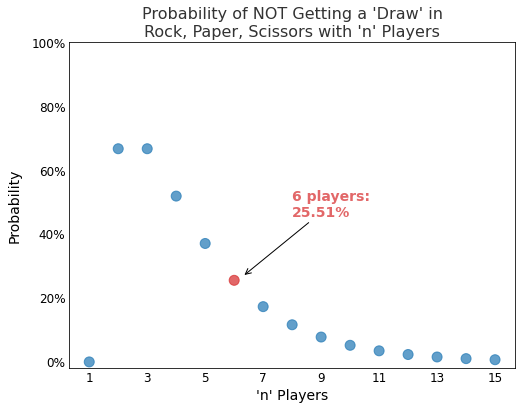

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

players = 6
odds = [rps(x) for x in range(1, 16)]
colors = ["tab:blue" if x!=6 else "tab:red" for x in range(1, len(odds) + 1)]

fig, ax = plt.subplots()
ax.scatter(range(1, len(odds) + 1), odds, color=colors, s=100, alpha=0.7)
ax.set_xlabel("'n' Players", fontsize=14)
ax.set_xticks(range(1, len(odds) + 1)[::2])
ax.set_ylabel("Probability", fontsize=14, labelpad=10)
ax.set_ylim(-0.02, 1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title("Probability of NOT Getting a 'Draw' in\nRock, Paper, Scissors with 'n' Players",
             fontsize=16, alpha=0.8)
ax.tick_params(axis="both", which="both", length=0, labelsize=12)
ax.annotate("{} players:\n{:.2%}".format(players, odds[players - 1]), 
            (players * 1.05, odds[players - 1]  * 1.05), (players + 2, odds[players - 1] + 0.2), 
            fontsize=14, alpha=0.7, color="tab:red", fontweight='bold', arrowprops={"arrowstyle": '->'})
fig.set_size_inches(8, 6)
plt.show()

## 3 - Double Check with Pandas

- Use a list comprehension to obtain all the permutations/possibilities of a round of "Rock, Paper, Scissors" given 6 players
- Import it into a pandas DataFrame
- Apply a function to each row ("round") to calculate how many unique items there were per round

Those rows (rounds) with 2 unique items were "no draw" rounds.

In [5]:
import pandas as pd

options = ["Rock", "Paper", "Scissors"]
permutations = [(x, y, z, a, b, c) for x in options for y in options for z in options 
         for a in options for b in options for c in options]
df = pd.DataFrame(permutations)
df.head()

,0,1,2,3,4,5
0,Rock,Rock,Rock,Rock,Rock,Rock
1,Rock,Rock,Rock,Rock,Rock,Paper
2,Rock,Rock,Rock,Rock,Rock,Scissors
3,Rock,Rock,Rock,Rock,Paper,Rock
4,Rock,Rock,Rock,Rock,Paper,Paper


With a total of 186 permutations in which "no draw" is possible, the probability is 186/729 = 25.51%.

In [6]:
results = df.apply(lambda x: x.nunique(), axis=1).value_counts()
results

3    540
2    186
1      3
dtype: int64

In [7]:
"{:.2%}".format(results[2] / results.sum())

'25.51%'

## 4 - Triple Check with Random Simulations

Create a function to simulate 'size' rounds of Rock, Paper, Scissors with 'n' players.

In [10]:
import numpy
np.random.seed(0)

def exper(size, n):
    experiment = np.random.choice(["Rock", "Paper", "Scissors"], size=(size, n))
    try:
        exper_odds = pd.DataFrame(experiment).nunique(axis=1).value_counts().loc[2] / size
    except KeyError:    # With larger values of "n", small sample sizes will often ONLY have nunique
        return 0        # of 3, thereby raising a KeyError. If '.loc[2]' doesn't exist, return 0.
    return exper_odds


"full_odds" runs 3 experiments of 100, 1000, and 5000 rounds of players ranging from 2 to 15, and records what percentage of each combination saw "non-draw" rounds.

In [11]:
full_odds = [[exper(s, n) for n in list(range(2, 16))] for s in [100, 1000, 5000]]
full_odds[0]

[0.62,
 0.74,
 0.5,
 0.31,
 0.18,
 0.12,
 0.12,
 0.11,
 0.06,
 0.03,
 0.02,
 0.01,
 0.03,
 0]

### Visualize the Random Simulations vs. Actual Probabilities

We can see that as the number of simulations increases, the simulated probability matches closer to the actual probability based on the previously defined function.

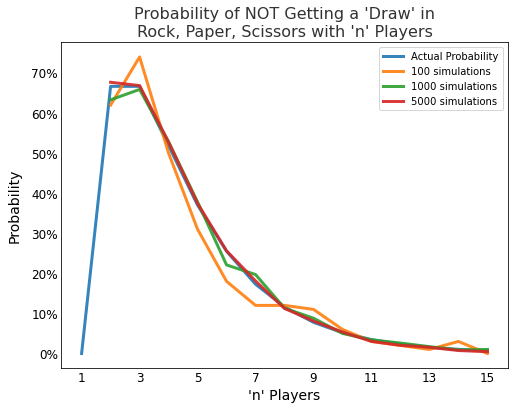

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy

players = 6
odds = [rps(x) for x in range(1, 16)]
sizes = [100, 1000, 5000]

fig, ax = plt.subplots()
ax.plot(range(1, len(odds) + 1), odds, label="Actual Probability", alpha=0.9, lw=3)
for n in range(3):
    ax.plot(range(2, len(odds) + 1), full_odds[n], label="{} simulations".format(sizes[n]), alpha=0.9, lw=3)
ax.set_xlabel("'n' Players", fontsize=14)
ax.set_xticks(range(1, len(odds) + 1)[::2])
ax.set_ylabel("Probability", fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title("Probability of NOT Getting a 'Draw' in\nRock, Paper, Scissors with 'n' Players",
             fontsize=16, alpha=0.8)
ax.tick_params(axis="both", which="both", length=0, labelsize=12)
ax.legend()
fig.set_size_inches(8, 6)
plt.show()

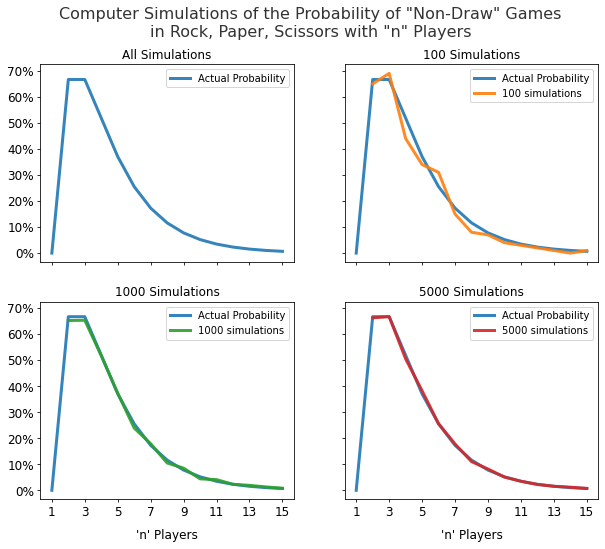

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy

def exper(size, n):
    experiment = np.random.choice(["Rock", "Paper", "Scissors"], size=(size, n))
    try:
        exper_odds = pd.DataFrame(experiment).nunique(axis=1).value_counts().loc[2] / size
    except KeyError:
        return 0
    return exper_odds

full_odds = [[exper(s, n) for n in list(range(2, 16))] for s in [100, 1000, 5000]]

players = 6
odds = [rps(x) for x in range(1, 16)]
sizes = [100, 1000, 5000]

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i, x in enumerate([(i, j) for i in range(2) for j in range(2)]):
    ax = axes[x]
    if x==(0, 0):
        ax.plot(range(1, len(odds) + 1), odds, label="Actual Probability", alpha=0.9, lw=3)
        ax.set_title("All Simulations")
    else:
        ax.plot(range(1, len(odds) + 1), odds, label="Actual Probability", alpha=0.9, lw=3)
        ax.plot(range(2, len(odds) + 1), full_odds[i-1], label="{} simulations".format(sizes[i-1]), 
                alpha=0.9, lw=3, color="C{}".format(i))
        ax.set_title("{} Simulations".format(sizes[i-1]))
    ax.set_xticks(range(1, len(odds) + 1)[::2])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.tick_params(axis="both", which="both", length=3, labelsize=12)
    ax.legend()

for each in [(1, 0), (1, 1)]:
    axes[each].set_xlabel("'n' Players", fontsize=12, labelpad=10)
fig.suptitle('Computer Simulations of the Probability of "Non-Draw" Games\nin Rock, Paper, Scissors with "n" Players',
              fontsize=16, alpha=0.8)
fig.set_size_inches(10, 8)
plt.show()

# Conclusion

With 6 people playing, you'd need to play an average of 4 rounds to get someone eliminated. Fourteen people, 100 rounds on average for at least one to be eliminated. Twenty people, 1000 rounds on average. By the time *anyone* would be eliminated, dinner would have come and the players would no longer be competing to not eat the last wing but to eat it.